In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hyperparameters & locations
</div>

In [5]:
locs = {'waiting_folder' : 'data/waiting times'}

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 1 : Reading the data
</div>

In [6]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:11<00:00,  4.35it/s]


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Cleaning the data
</div>

In [7]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1318703 rows


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Visualizing the data that we have in a very simple way
</div>

In [8]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe()
df_wait_post.head(10)

,attraction,date,datetime,SPOSTMIN
0,7_dwarfs_train,2015-01-01,2015-01-01 07:51:12,45.0
1,7_dwarfs_train,2015-01-01,2015-01-01 08:02:13,60.0
3,7_dwarfs_train,2015-01-01,2015-01-01 08:09:12,60.0
4,7_dwarfs_train,2015-01-01,2015-01-01 08:16:12,60.0
6,7_dwarfs_train,2015-01-01,2015-01-01 08:23:12,60.0
7,7_dwarfs_train,2015-01-01,2015-01-01 08:29:12,60.0
8,7_dwarfs_train,2015-01-01,2015-01-01 08:37:13,90.0
9,7_dwarfs_train,2015-01-01,2015-01-01 08:44:11,105.0
10,7_dwarfs_train,2015-01-01,2015-01-01 08:50:33,105.0
11,7_dwarfs_train,2015-01-01,2015-01-01 08:51:12,105.0


In [9]:
df_wait_act.groupby('attraction')['SACTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,7634.0,36.166623,22.950125,0.0,21.0,31.0,46.00,217.0
alien_saucers,3031.0,22.068624,12.586751,0.0,13.0,21.0,30.00,79.0
astro_orbiter,1770.0,20.402260,9.501468,0.0,14.0,20.0,26.00,65.0
barnstormer,3087.0,12.528345,9.900399,0.0,5.0,11.0,18.00,70.0
big_thunder_mtn,11729.0,18.251513,12.913191,0.0,9.0,16.0,25.00,125.0
buzz_lightyear,7998.0,14.120780,12.355926,0.0,5.0,11.0,20.00,109.0
carousel_of_progress,876.0,4.179224,4.455348,0.0,1.0,2.0,6.00,33.0
country_bears,362.0,7.842541,7.213412,0.0,2.0,6.0,11.00,40.0
dinosaur,5059.0,20.197075,15.332370,0.0,8.0,17.0,29.00,96.0


In [10]:
# Create a dropdown widget for selecting attractions
attraction_dropdown = widgets.Dropdown(
    options=attractions,
    description='Attraction:',
    value=attractions[0]  # Default value
)

# Function to update the plot based on selected attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  # Create a new figure
    plt.subplot(1, 2, 1)  # First subplot
    df_wait_attraction = df_wait.query("attraction == @attraction")
    df_wait_attraction.SACTMIN.plot.hist(bins=30, title='Actual waiting times')
    
    plt.subplot(1, 2, 2)  # Second subplot
    df_wait_attraction.SPOSTMIN.plot.hist(bins=np.arange(-2.5, df_wait.SPOSTMIN.max() + 2.5, 10), title='Posted waiting times')
    
    plt.tight_layout()

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 2 : Validate the data with some visuals
</div>

(400.0, 1502.45)

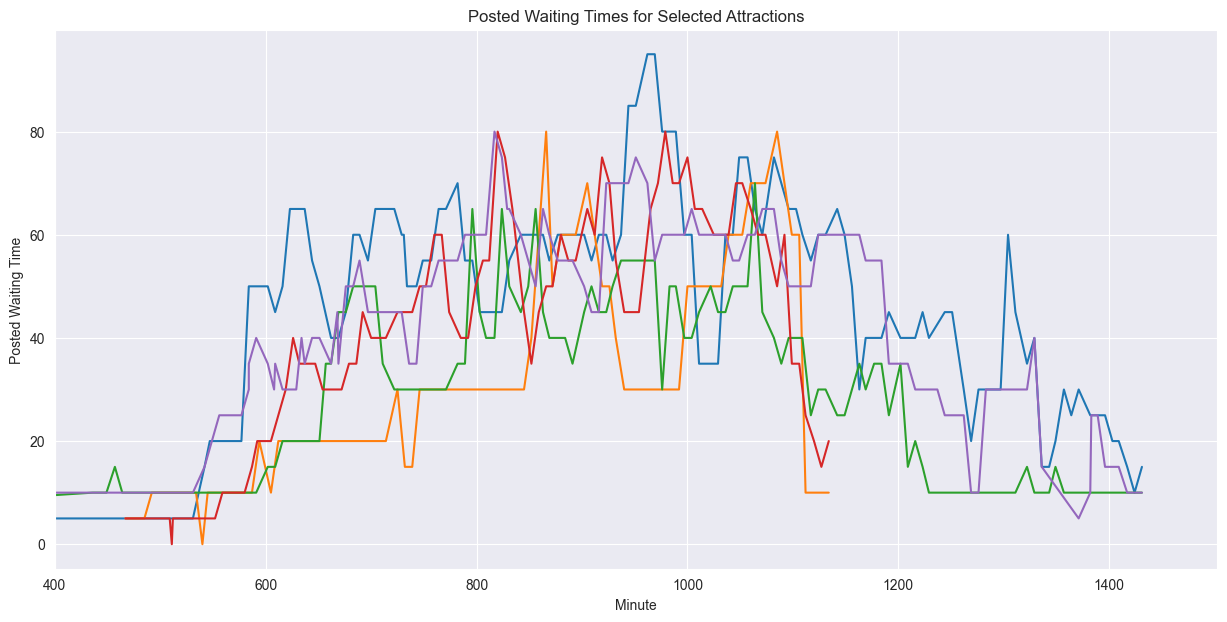

In [25]:
# Extract "minutes from df_wait" from the datetime column
df_wait_post['minute'] = df_wait_post['datetime'].dt.hour * 60 + df_wait_post['datetime'].dt.minute
date = pd.Timestamp('2015-01-01')

# Filter for specific attractions
selected_attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']
df_selected = df_wait_post[df_wait_post['attraction'].isin(selected_attractions)]
df_selected = df_selected.sort_values(by=['minute'])

start_minute = df_selected['minute'].min()
# Find the earliest minute on the selected date
earliest_minute = df_selected[df_selected['date'] == date]['minute'].min()

# Create the plot
plt.figure(figsize=(15, 7))

#Plot each attraction's waiting times
for attraction in selected_attractions:
    attraction_data = df_selected[
        (df_selected['attraction'] == attraction) &
        (df_selected['date'] == date)
    ]
    plt.plot(
        attraction_data['minute'], 
        attraction_data['SPOSTMIN'], 
        label=attraction
    )

plt.title('Posted Waiting Times for Selected Attractions')
plt.xlabel('Minute')
plt.ylabel('Posted Waiting Time')
plt.xlim(400)

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 3 : Study for which attractions we have sufficient information for posted waiting time
</div>

Text(0.5, 1.0, 'Average data points per Date for Each Attraction')

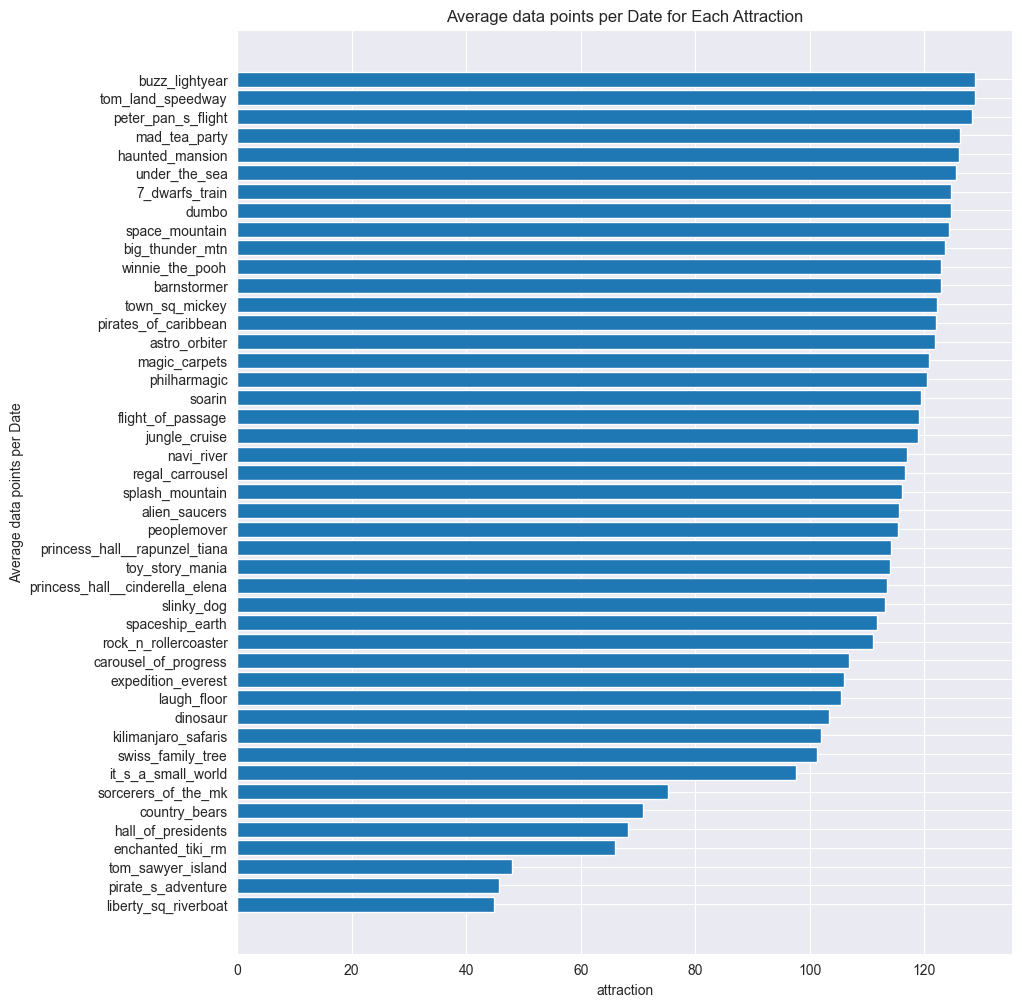

In [35]:
df_step3 = df_wait_post[df_wait_post['SPOSTMIN'].notna()]

grouped_attraction_date = df_step3.groupby(['attraction', 'date']).size().reset_index(name='count')

# Calculate the average number of rows per date for each attraction
average_counts = grouped_attraction_date.groupby('attraction')['count'].mean().reset_index(name='avg_count')
average_counts = average_counts.sort_values(by='avg_count')

df_wait_post.head(16)
plt.figure(figsize=(10, 12))
plt.barh(
    average_counts['attraction'], 
    average_counts['avg_count']
    )
# Customize the plot
plt.xlabel('attraction')
plt.ylabel('Average data points per Date')
plt.title('Average data points per Date for Each Attraction')

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    STEP 4 : Study the distribution of data availability for actual waiting time information.
</div>

In [42]:
# Group by date and count the number of actual waiting time records per day
actual_counts_per_day = df_wait_act.groupby('date').size().reset_index(name='actual_counts')
post_counts_per_day = df_wait_post.groupby('date').size().reset_index(name='actual_counts')

Text(0, 0.5, 'Number of Records')

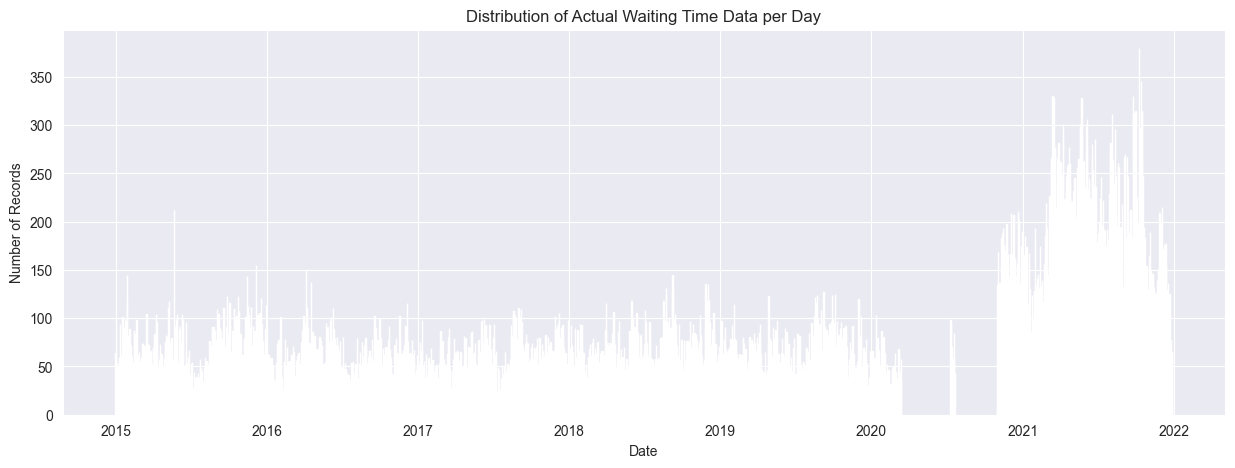

In [40]:
# Visualization 1: Distribution of data availability per day
plt.figure(figsize=(15, 5))
plt.bar(actual_counts_per_day['date'], actual_counts_per_day['actual_counts'], color='yellow')
plt.title('Distribution of Actual Waiting Time Data per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')

Text(0, 0.5, 'Number of Records')

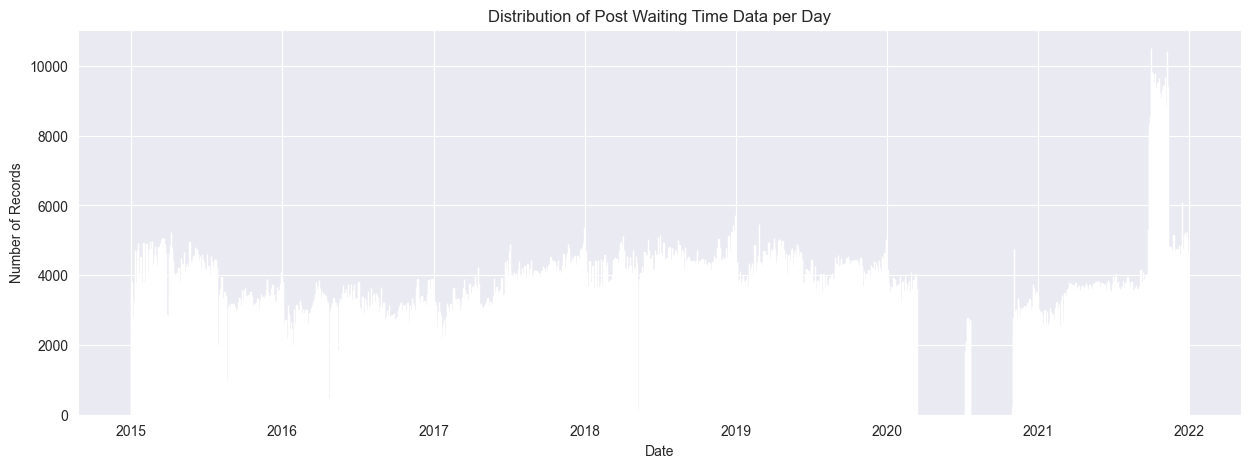

In [45]:
# Visualization 1: Distribution of data availability per day
plt.figure(figsize=(15, 5))
plt.bar(post_counts_per_day['date'], post_counts_per_day['actual_counts'], color='skyblue')
plt.title('Distribution of Post Waiting Time Data per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')

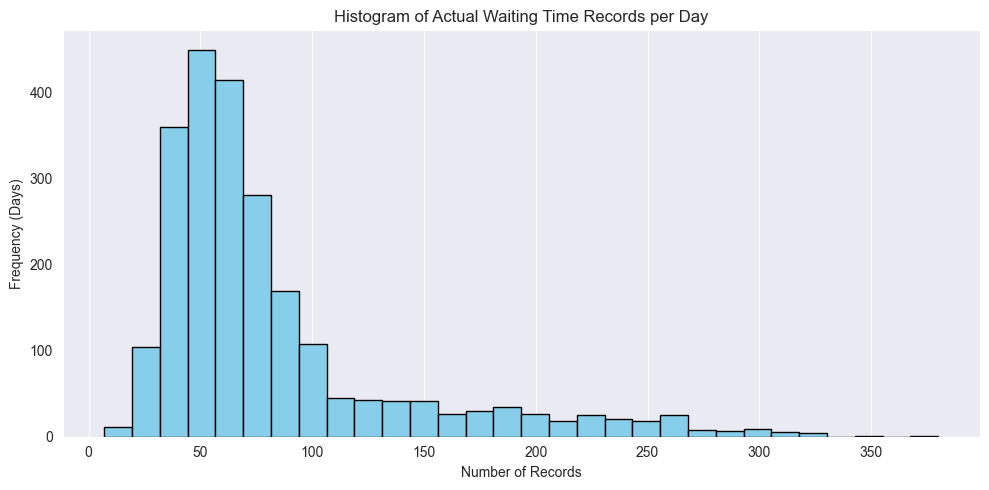

In [44]:
# Visualization 2: Histogram of the number of records per day
plt.figure(figsize=(10, 5))
plt.hist(actual_counts_per_day['actual_counts'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Actual Waiting Time Records per Day')
plt.xlabel('Number of Records')
plt.ylabel('Frequency (Days)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Actual Waiting Time (minutes)')

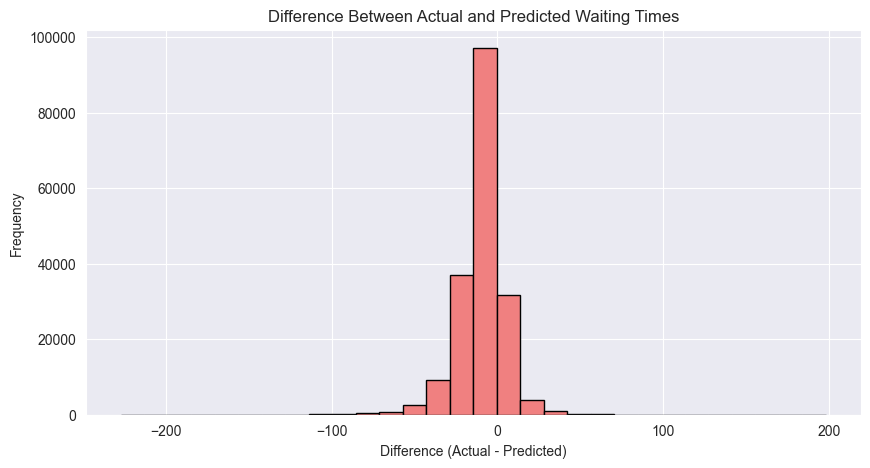

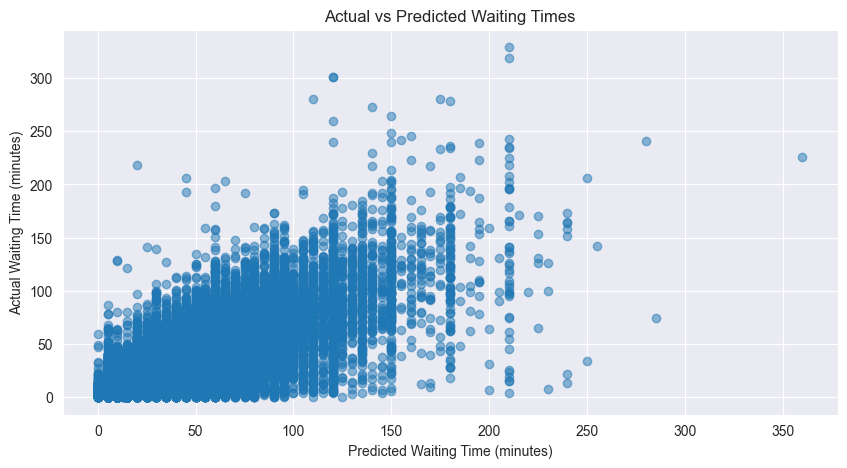

In [48]:
# Merge actual and posted times based on datetime and attraction
merged_df = pd.merge_asof(
    df_wait_act.sort_values('datetime'),
    df_wait_post.sort_values('datetime'),
    on='datetime',
    by='attraction',
    direction='nearest',
    tolerance=pd.Timedelta('10m')
)

# Calculate the difference
merged_df['difference'] = merged_df['SACTMIN'] - merged_df['SPOSTMIN']

# Visualization 1: Histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(merged_df['difference'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Difference Between Actual and Predicted Waiting Times')
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')


# Visualization 2: Scatterplot of actual vs predicted times
plt.figure(figsize=(10, 5))
plt.scatter(merged_df['SPOSTMIN'], merged_df['SACTMIN'], alpha=0.5)
plt.title('Actual vs Predicted Waiting Times')
plt.xlabel('Predicted Waiting Time (minutes)')
plt.ylabel('Actual Waiting Time (minutes)')


In [50]:
# Group by day of week and holiday indicator
avg_waits_day_holiday = df_selected.groupby(['date', 'HOLIDAYM'])['SPOSTMIN'].mean().reset_index()

# Visualization: Combination of day of week and holiday
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='SPOSTMIN', hue='HOLIDAYM', data=avg_waits_day_holiday, palette='viridis')
plt.title('Average Posted Waiting Time per Day of the Week Considering Holiday (Rides)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Posted Waiting Time (minutes)')
plt.legend(title='Holiday (1 = Yes, 0 = No)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KeyError: 'HOLIDAYM'